<a href="https://colab.research.google.com/github/bianca-isaac/Repositorio/blob/main/PT_An%C3%A1lise_de_dados_de_Toronto_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de Toronto - Canadá usando Pandas e dos Dados do Airbnb.

Todo bom negocio nasce de um problema que precisamos resolver. E foi o que aconteceu com o  [Airbnb](https://www.airbnb.com.br/). A ideia surgiu em 2008 quando dois designers hospedarem viajantes que procuravam local para ficar em um espaço sobrando. 
De acordo com seu site hoje contam com 4 milhões de anfitriões que já receberam mais de 800 milhões de chegadas de hóspedes em cerca de 100 mil cidades em quase todos os países e regiões do mundo.

Através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a Airbnb disponibiliza dados de algumas das principais cidades do mundo. 
Com a grande quantidade de dados existentes no portal é possível desenvolver projetos de *Data Science*. 


**O objetivo deste *notebook* é realizar uma análise exploratória dos dados referentes à cidade de Toronto no Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

Este *notebook* foi realizado como um dos projetos que fazem parte das aulas do curso Data Science na Prática do [*Sigmoidal*](https://sigmoidal.ai/).



Artigo no Medium

## Obtenção dos Dados

Os dados foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) 

Esta será uma análise exploratória inicial do dados. 
Arquivo utilizado: 


*   [listings.csv](http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv) - Summary information and metrics for listings in Toronto (good for visualisations).





In [ ]:
# importação dos pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
!pip install wordcloud -q

sns.set_theme(style="ticks", palette="pastel")
%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-01-02/visualisations/listings.csv")

Observando as 5 primeiras e últimas entradas do dataset.

In [ ]:
# Verificar a estrutura
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1419,Beautiful home in amazing area!,1565,Alexandra,NaN,Little Portugal,43.64617,-79.42451,Entire home/apt,469,4,7,2017-12-04,0.11,1,0
1,8077,Downtown Harbourfront Private Room,22795,Kathie & Larry,NaN,Waterfront Communities-The Island,43.64105,-79.37628,Private room,96,180,169,2013-08-27,1.22,2,365
2,12604,Seaton Village Parlour Bedroom,48239,Rona,NaN,Annex,43.66724,-79.41598,Private room,64,1,0,NaN,NaN,1,0
3,23691,Queen Bedroom close to downtown,93825,Yohan & Sarah,NaN,Briar Hill-Belgravia,43.69602,-79.45468,Private room,70,1,217,2019-12-22,1.68,2,324
4,27423,Executive Studio Unit- Ideal for One Person,118124,Brent,NaN,Greenwood-Coxwell,43.66890,-79.32592,Entire home/apt,45,365,26,2011-08-30,0.20,1,0


In [ ]:
# mostrar as 5 últimas entradas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18260,47376260,"Private Ensuite room, Comfy Guest House, Toronto",138145,Comfy Guest House,NaN,Moss Park,43.66206,-79.36938,Private room,79,2,0,NaN,NaN,1,245
18261,47376858,Modern Nice and Cozy 3Bedroom House in Scarbor...,61575224,Sean,NaN,Woburn,43.77640,-79.22799,Entire home/apt,222,1,0,NaN,NaN,4,364
18262,47377779,Private Bedroom Downtown Toronto,317648405,Dan,NaN,Dovercourt-Wallace Emerson-Junction,43.67071,-79.42656,Private room,31,1,0,NaN,NaN,2,103
18263,47389938,"2 Bedrooms, 1 Bathroom YONGE & SHEPPARD - YS25FL1",12742095,Emil & Sue,NaN,Willowdale East,43.76257,-79.41037,Entire home/apt,115,28,0,NaN,NaN,29,334
18264,47390017,"Lakeview Condo, CN Tower, Free Parking, Mthly ...",91170750,Yawen,NaN,Waterfront Communities-The Island,43.63958,-79.39742,Entire home/apt,55,28,0,NaN,NaN,1,31


## Análise dos Dados


A etapa inicial de análise de dados é a mais importante em qualquer projeto. 

É necessário analisarmos os atributos e suas características como: 
* tipo
* Presença de ouliers
* Identificar o % de dados faltantes

Muitas vezes com uma análise exploratória bem feita conseguimos responder perguntas e hipóteses iniciais. 

In [ ]:
# Nomes colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* *id* - número de identificação específico para o imóvel 
* *name* - nome do imóvel 
* *host_id* - número de identificação específico do anfitrião
* *host_name* - nome do anfitrião
* *neighbourhood_group* - não possui dados válidos
* *neighbourhood* - bairro
* *latitude* - coordenada de latitude do imóvel
* *longitude* - coordenada de longitude do imóvel
* *room_type* - casa inteira/somente quarto
* *price* - preço aluguel
* *minimum_nights* - mínimo de noites para reservar 
* *number_of_reviews* - número de reviews do imóvel
* *last_review* - data último review
* *reviews_per_month* - quantidade de reviews por mês
* *calculated_host_listings_count* - número de imóveis por anfitrião
* *availability_365* -  disponibilidade dentro de 365 dias



### **Quantos atributos e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Analisar o tipo das variáveis é importante para podermos saber como trabalhar com os dados e identificar se faz sentido o tipo da variável para a análise que pretendemos fazer. 
* Tipo (numérica, categórica, float, int, etc)

In [ ]:
# mostra volume de dados 
# linhas
print("Linhas:\t {}".format(df.shape[0]))
#colunas
print("Variáveis:\t{}\n".format(df.shape[1]))


Linhas:	 18265
Variáveis:	16



Este dataset apresenta 18265 linhas e 16 variáveis

Agora vamos verificar os tipos das variáveis

In [ ]:
# Verifica tipo das variáveis
tipos_de_dados = pd.DataFrame(df.dtypes, columns = ['Tipos de Dados'])
tipos_de_dados

,Tipos de Dados
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
# valores únicos
print("\nVALORES ÚNICOS:")
print(df.nunique().sort_values())


VALORES ÚNICOS:
neighbourhood_group                   0
room_type                             4
calculated_host_listings_count       39
minimum_nights                      103
neighbourhood                       140
availability_365                    365
number_of_reviews                   379
price                               582
reviews_per_month                   773
last_review                        1690
host_name                          5374
latitude                           8987
longitude                         11220
host_id                           12020
name                              17823
id                                18265
dtype: int64


### **Qual a porcentagem de valores ausentes no *dataset*?**

Ao identificar a quantidade de dados ausentes podemos verificar a qualidade do *dataset*. 

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. Ao fazermos essa análise podemos entender se esses valores ausentes/nulos são significativos comparados ao total de entradas.

In [ ]:
# Identifica a quantidade de dados ausentes nas variáveis por percentual e em ordem decrescende de valor ausente

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.224747
last_review                       0.224747
host_name                         0.000602
name                              0.000055
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Para este *dataset*:
* A coluna *neighbourhood_group* possui 100% dos seus valores faltantes
* As colunas *reviews_per_month* e *last_review* aproximadamente 22 % de valores nulos cada

### **Tipo de distribuição das variáveis** 

Média dos dados

In [ ]:
# ver a média da coluna `price``
df.mean()


id                                2.731412e+07
host_id                           1.126755e+08
neighbourhood_group                        NaN
latitude                          4.368107e+01
longitude                        -7.939741e+01
price                             1.376597e+02
minimum_nights                    1.348262e+01
number_of_reviews                 2.602124e+01
reviews_per_month                 1.095512e+00
calculated_host_listings_count    4.718478e+00
availability_365                  1.114296e+02
dtype: float64

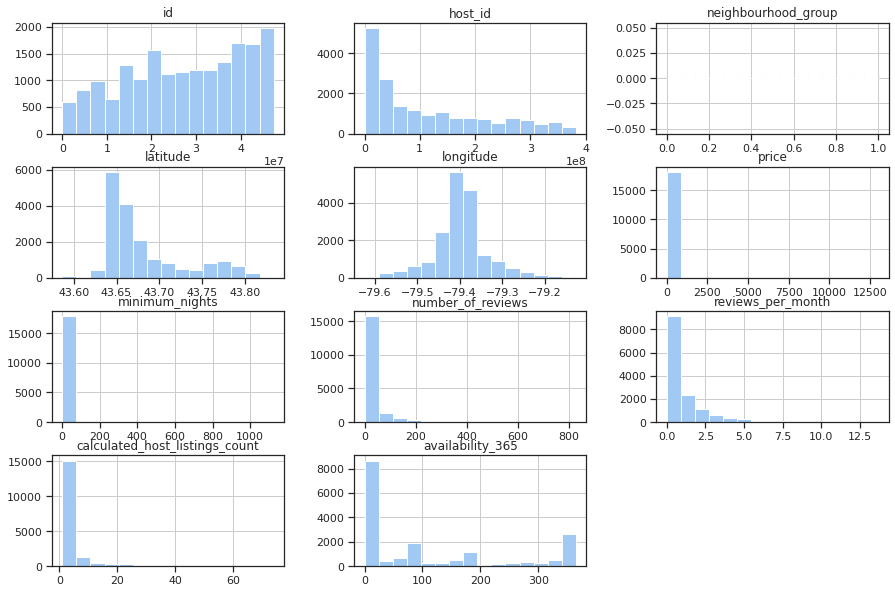

In [ ]:
# histograma das variáveis numéricas
# ao colocar  o ; no final não mostra texto inicial
df.hist(bins=15, figsize=(15,10));


Ao analisar as distribuições por histograma podemos verificar que existem *outliers* nas variáveis `price`, minimun_nights, `number_of_reviews`, `reviews_per_month` e `calculated_host_listings_count`.                            

### Confirmando a existência de *outliers*

Podemos confirmar a existência de *outliers* através do resumo estatístico dos dados e/ou *boxplots* para as variáveis

**Para este estudo vamos analisar os dados de preço e mínimo de noites com relação aos bairros.** 


In [ ]:
# resumo estatístico 
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,18265.000000,18265.000000
mean,137.659677,13.482617
std,306.423241,38.038305
min,0.000000,1.000000
25%,60.000000,1.000000
50%,95.000000,2.000000
75%,149.000000,20.000000
max,13000.000000,1125.000000


Com o Box-plot conseguimos vizualiar as seguintes informações: 
a mediana, representada pela linha central dentro da caixa 

1.   Mediana - linha amarela central dentro da caixa
2.   Q1 e Q3 - primeiro e terceiro quartil
3. os valores limites para identificação de outliers - hastes da caixa, em ambos os lados
4. Outliers - pontos ao extremos



![Box-plot.png](https://drive.google.com/file/d/1dZ2dShY2KvFvnwVLsnrMOpNuwPrPPlcy/view?usp=sharing)

(imagem: [Escola de Dados](https://escoladedados.org/tutoriais/analise-com-estatistica-descritiva-para-leigos/))

**Box-plot antes de remover os outliers**

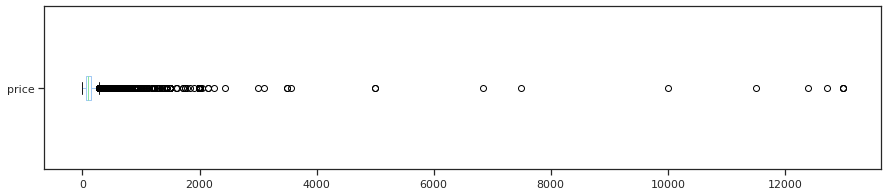

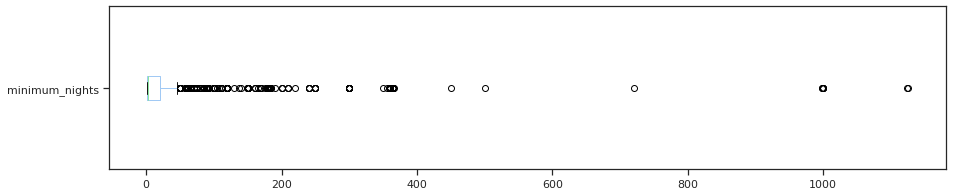

In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

### **Removendo *outliers***

Para removermos os *outliers* estabelecemos um limite superior e inferior. Então os valores que estiverem acima ou abaixo desses limites serão considerados *outliers*.

Valores acima da linha superior serão os valores que forem maior que o valor da média mais o valor de duas vezes o desvio padrão.

E o limite inferior será o valor da média menos duas vezes o valor do desvio padrão.

Assim estabelecemos um intervalo onde considera-se que contém dados com valores “normais”, os dados com valores fora desse intervalo devem ser tratados.

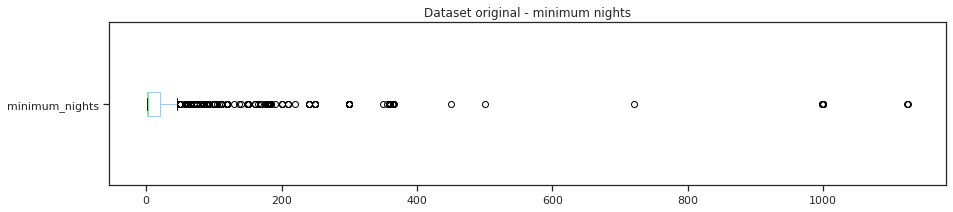

IQR minimum_nights:  19.0
Upper limit:  48.5
Lower limit:  -27.5
626 Entries above upper limit
3.43% of dataset


In [ ]:
# Displaying the box plot for minimum nights
fig, ax = plt.subplots(figsize=(15,3))
df['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Dataset original - minimum nights')
plt.show()

# IQR rule for variable minimum nights
q1_mn = df.minimum_nights.quantile(q=0.25)
q3_mn = df.minimum_nights.quantile(q=0.75)
IQR_mn = q3_mn - q1_mn

print('IQR minimum_nights: ', IQR_mn)

sup_mn = q3_mn + 1.5 * IQR_mn
inf_mn = q1_mn - 1.5 * IQR_mn

print('Upper limit: ', sup_mn)
print('Lower limit: ', inf_mn)

print("{} Entries above upper limit".format(len(df[df.minimum_nights > sup_mn])))
print("{:.2f}% of dataset".format((len(df[df.minimum_nights > sup_mn]) / df.shape[0])*100))

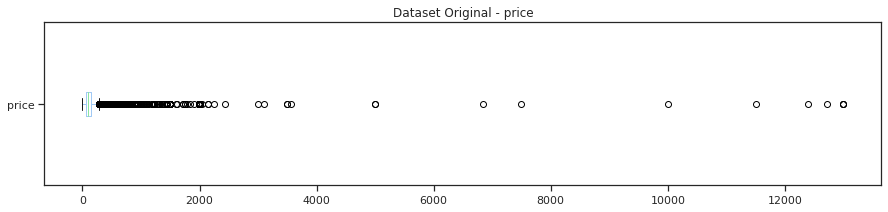

IQR price:  89.0
Upper limit:  282.5
Lower limit:  -73.5
1200 Entries above upper limit
6.57% of dataset


In [ ]:
# Displaying the box plot for price
fig, ax = plt.subplots(figsize=(15,3))
df['price'].plot(kind='box', vert=False)
ax.set_title('Dataset Original - price')
plt.show()


# IQR rule for variable price
q1_price = df.price.quantile(q=0.25)
q3_price = df.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)


print("{} Entries above upper limit".format(len(df[df.price > sup_price])))
print("{:.2f}% of dataset".format((len(df[df.price > sup_price]) / df.shape[0])*100))

**Box-plot após remover os outliers**

Após a removação dos *outliers* conseguimos ter uma melhor visualização da distribuição de frequencia relacionada à variável `price` e `minimum_nights`

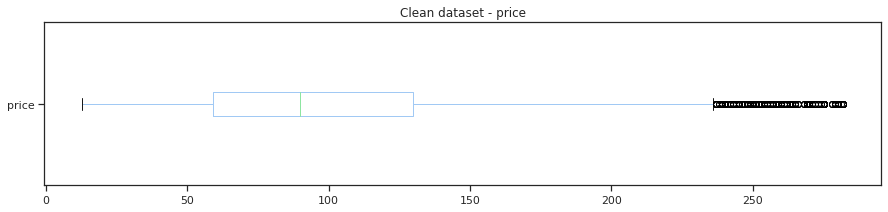

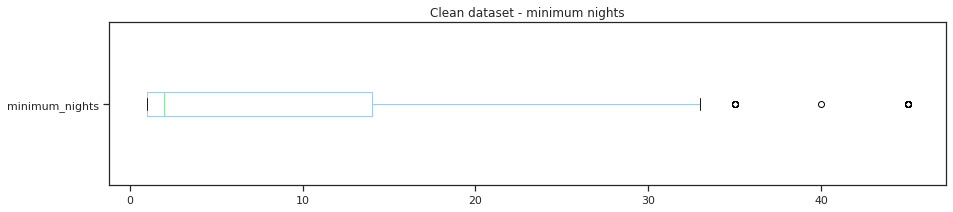

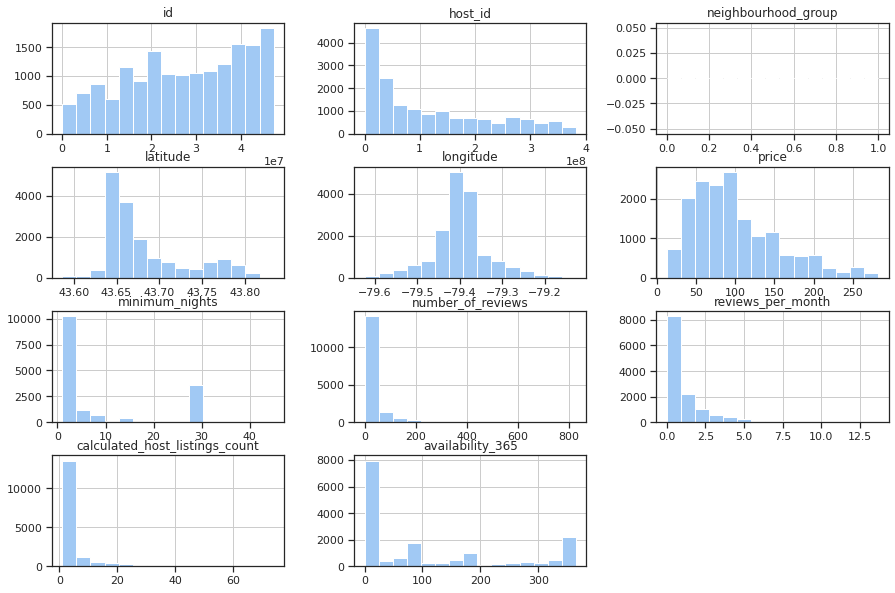

In [ ]:
# Remoção dos outliers de price e minimum_nights
df_clean = df[(df['price'] <= 282.5) & (df['price'] > 0) & (df['minimum_nights'] <= 48)].copy()

# Novo Box-plot
fig, ax = plt.subplots(figsize=(15,3))
df_clean['price'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - price')
plt.show()


fig, ax = plt.subplots(figsize=(15,3))
df_clean['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - minimum nights')
plt.show()


# Novo histograma
df_clean.hist(bins=15, figsize=(15,10));


## Exploratory Questions

Agora que fizemos a limpeza e adequação dos dados para uma melhor análise vamos responder algumas questões cuja inteção é te ajudar a escolher qual a melhor localidade para se hospedar em Toronto.

### Distribuição por tipo de acomodação

Tipode de acomodação:

In [ ]:
# number of listings by type of property
df_clean.room_type.value_counts()

Entire home/apt    10004
Private room        6123
Shared room          301
Hotel room            56
Name: room_type, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


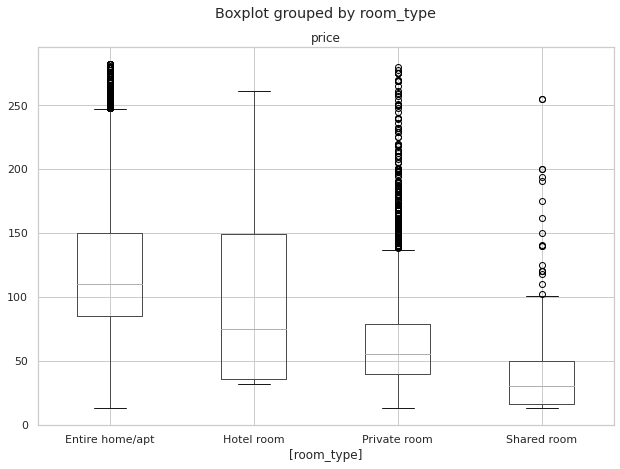

In [ ]:
df_clean.boxplot(['price'], by = ['room_type'], figsize=(10,7), )
plt.show();

** Média por tipo de acomodação**

In [ ]:
# Calculating the average price by property types
var = df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]
print(var)

room_type
Entire home/apt    123.773191
Hotel room          94.142857
Private room        65.293157
Shared room         42.554817
Name: price, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


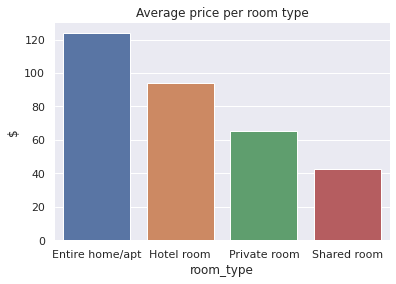

In [ ]:
# Plotting the average price by type of property
ax = sns.barplot(var.index, var) 
ax.set_title('Average price per room type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Conseguimos observar que:

* `Entire home/apt` e `Private Room` e possuem mediana quase igual, porém a distribuiçao em `Private Room` é maior.

* `Private Room`, existem diversos outliers. 

* Shared room possui os menores preços, o que coincide com a realidade, assim como Entire home/apt possui os maiores preços.

**Relação entre tipo de acomodação e locação**

Para isso achamos o percentual de propriedades por tipo de locação

In [ ]:
room_per = df_clean.room_type.value_counts() / df_clean.shape[0] *100
print(room_per)

Entire home/apt    60.689153
Private room       37.145110
Shared room         1.826013
Hotel room          0.339723
Name: room_type, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


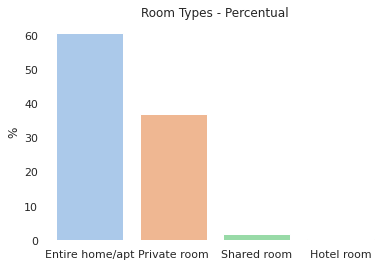

In [ ]:
# Gráfico de barras do percentual por tipo de propriedade
ax = sns.barplot(room_per.index, room_per) 
ax.set_title('Room Types - Percentual')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False);

Podemos observar que Entire home/apt representa mais da metade de todas as locações. 

### **Distribuição por bairro**


Como visto anteriormente a variável `neighbourhood` possui 140 nomes de bairros

Com base nas análises abaixo 



In [ ]:
neighbourhood_per = df_clean.neighbourhood.value_counts() / df_clean.shape[0] *100
print(neighbourhood_per)

Waterfront Communities-The Island    16.658578
Niagara                               4.022082
Church-Yonge Corridor                 3.348702
Annex                                 3.209173
Kensington-Chinatown                  2.911915
                                       ...    
Markland Wood                         0.066731
Humbermede                            0.060665
Thistletown-Beaumond Heights          0.060665
Kingsway South                        0.054598
Rustic                                0.036399
Name: neighbourhood, Length: 140, dtype: float64


In [ ]:
pd.DataFrame(df_clean['neighbourhood'].value_counts()[:5])

,neighbourhood
Waterfront Communities-The Island,2746
Niagara,663
Church-Yonge Corridor,552
Annex,529
Kensington-Chinatown,480


In [ ]:
# Selecionando os 5 primeiros bairros

neighbourhood_top = ['Waterfront Communities-The Island' , 'Niagra' , 'Church-Yonge Corridor' , 'Annex', 'Kensington-Chinatown'] 
neighbourhood_top = df_clean['neighbourhood'].isin(neighbourhood_top)
df_neighbourhood = df_clean[neighbourhood_top]

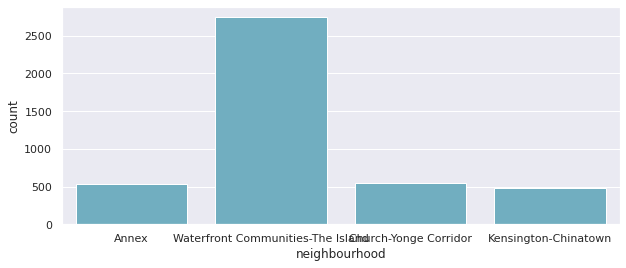

In [ ]:
plt.figure(figsize=(10,4))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="neighbourhood", color="c" , data=df_neighbourhood)

Para completar a  análise com relação a distrubiuição de imóveis pela cidade de Toronto é interessante olharmos a distruibuição em um mapa interativo. 

Para isso é necessário importar a biblioteca `ploty`.

In [ ]:
#importing plotly
import plotly.express as px

#plotting our map
fig = px.scatter_mapbox(df_clean, lat="latitude", lon="longitude", hover_name="name",
                        color_discrete_sequence=["red"], zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### **Qual a localidade mais cara do dataset?**



Quando vamos fazer uma viagem uma das primeiras coisas que fazemos é olhar o preço dos alugueis. Dessa forma conseguimos ter uma ideia dos bairros mais caros e baratos.

Para compararmos variáveis podemos utilizar a função `groupby()`.
Para este exemplo vamo comparar os bairros de acordo com seu preço de localização. 

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lawrence Park South                  162.409091
Etobicoke West Mall                  161.645161
Waterfront Communities-The Island    160.454214
Leaside-Bennington                   157.023810
The Beaches                          152.673469
Markland Wood                        150.461538
South Riverdale                      149.911043
Rosedale-Moore Park                  149.188679
Niagara                              145.345070
Cabbagetown-South St.James Town      143.610256
Name: price, dtype: float64

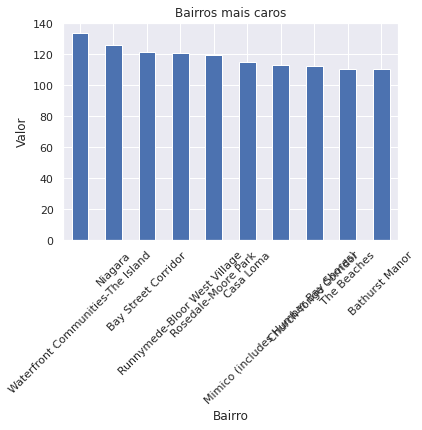

neighbourhood
Waterfront Communities-The Island      133.594683
Niagara                                125.663650
Bay Street Corridor                    121.064240
Runnymede-Bloor West Village           120.764706
Rosedale-Moore Park                    119.494737
Casa Loma                              115.152542
Mimico (includes Humber Bay Shores)    112.985577
Church-Yonge Corridor                  112.605072
The Beaches                            110.590551
Bathurst Manor                         110.567568
Name: price, dtype: float64


In [ ]:
# Bairros mais caros
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Bairros mais caros')
plt.xlabel('Bairro')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10])

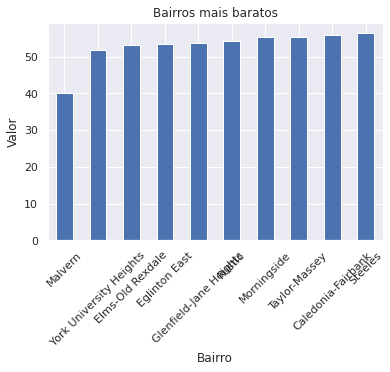

neighbourhood
Malvern                    40.092437
York University Heights    51.813253
Elms-Old Rexdale           53.083333
Eglinton East              53.289474
Glenfield-Jane Heights     53.593750
Rustic                     54.333333
Morningside                55.303030
Taylor-Massey              55.439024
Caledonia-Fairbank         55.803922
Steeles                    56.333333
Name: price, dtype: float64


In [ ]:
# Bairros mais baratos
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10].plot(kind='bar')
plt.title('Bairros mais baratos')
plt.xlabel('Bairro')
plt.ylabel('Valor')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10])

Como todo cidadão brasileiros gostamos sempre de procurar por "achados" ou seja ficar no bairro mais caro pagando menos. 

Mas qual o menor valor de dirária que podemos encontrar no bairro **Waterfront Communities-The Island** ?

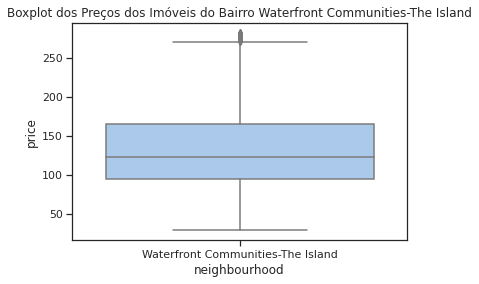

In [ ]:
# plotar o boxplot
sns.boxplot(x = "neighbourhood", y="price", data=df_clean.loc[df_clean['neighbourhood'] == 'Waterfront Communities-The Island'])
plt.title("Boxplot dos Preços dos Imóveis do Bairro Waterfront Communities-The Island")
plt.show()

In [ ]:
# Aplicando estatística descritiva para ver o valor exato
df_clean['price'].loc[df_clean['neighbourhood'] == 'Waterfront Communities-The Island'].describe()

count    2746.000000
mean      133.594683
std        51.340294
min        29.000000
25%        95.000000
50%       123.000000
75%       165.000000
max       282.000000
Name: price, dtype: float64

A média de preços do bairro *Waterfront Communities-The Island* é de $133,59 porém 25% dos preços estão abaixo de $95,00. 

Então para a nossa felicidade existe a possibilidade de encotrar imóveis com preço de locação mais maisxos no bairro mais caro.

### O que falam sobre Toronto?

Através da contagem das palavras que as pessoas usaram para descrever o bairro podemos ter uma ideia dos motivos pelo qual o bairro é o mais caro para alugar. 
As palavras maiores são as que aparecem com mais frequência e as menores com menos frequência. 

Irei utilizar a núvem de palavras com os *dataset* completo do Inside Airbnb.

In [ ]:
df_words = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-02-08/data/listings.csv.gz")

In [ ]:
df_words.head()

In [ ]:
# mostra volume de dados 
# linhas
print("Linhas:\t {}".format(df_words.shape[0]))
#colunas
print("Variáveis:\t{}\n".format(df_words.shape[1]))

Linhas:	 15832
Variáveis:	74



In [ ]:
# Identifica a quantidade de dados ausentes nas variáveis por percentual e em ordem decrescende de valor ausente
print(df_words.neighborhood_overview.isnull().sum())

5950


In [ ]:
# Elimina valores ausentes da coluna neighborhood_overview
neighborhood_overview	 = df_words.dropna(subset=['neighborhood_overview'], axis=0)['neighborhood_overview']

In [ ]:
# exemplos de overviews para os bairros do Airbnb
display(neighborhood_overview	.iloc[100])
display(neighborhood_overview	.iloc[120])

'Walking distance to TTC Broadview station. Access to any part of the city from this central location. If you drive, there are 3 routes to the highway. Walk across the street to 24 hr Sobeys (with wine), Dairy Queen, Todmorden hiking trail, Chester Hill Lookout point, walk in clinics, pharmacies, TD and CIBC banks, massage therapy, 24 hr convenience store, and a variety of bars and restaurants on the Danforth. <br /><br />Minutes to Woodbine beach, riverdale outdoor pool, tennis, hockey rink.<br /><br />location amenities: <br />http://goo.gl/maps/tOs11'

"We live in  a very safe multicultural neighbourhood; excellent public transportation,good restaurants, farmers' market every saturday; near the ravines"

In [ ]:
# Quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_description)))

Quantidade de Palavras: 3474813


In [ ]:
# concatenar as palavras
all_neighborhood_overview = " ".join(s for s in neighborhood_overview)
 

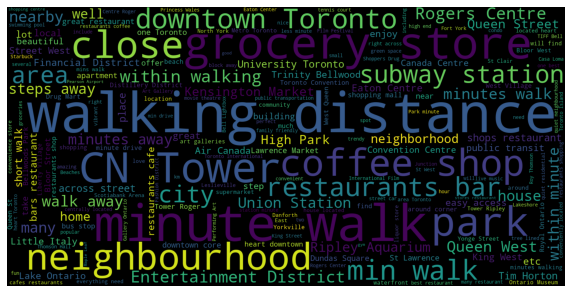

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "br"]) # Eliminar palavras que não tem significado
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_neighborhood_overview)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("airbnb_neighborhood_overview_wordcloud.png")

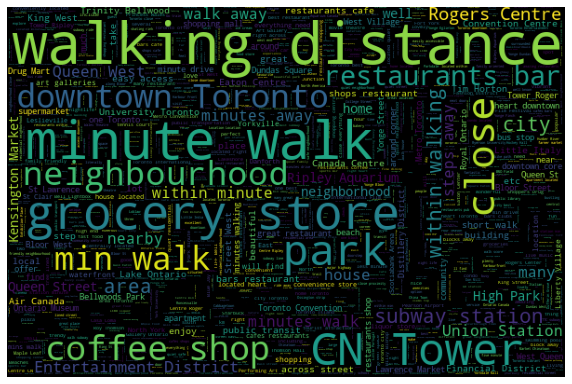

In [ ]:
# endereço LOCAL da SUA imagem
toronto_mask = np.array(Image.open(requests.get("https://github.com/bianca-isaac/Repositorio/blob/main/toronto2.jpg?raw=true", stream=True).raw))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=toronto_mask, max_font_size=200,
                      min_font_size=1).generate(all_neighborhood_overview)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_all_neighborhood_overview_wordcloud.png")

Com a análise das frequências das palavras conseguimos identificar algumas caracteríscias da região. 

## Resumo


Foi feita apenas uma análise exploratória inicial na base de dados do Airbnb.
Vimos que existem algumas variáveis com dados faltantes e outras com outliers. 

Em algumas localidades há poucos imóveis disponíveis, o que contribui para distorcer as informações estatísticas de algumas variáveis. 
Nas variáveis price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 identificamos a existencia de ouliters.
Removemos os outliers para podermos ter dados estatísticos mais apurados. 





Bairros com maior disponibilidade de locação X Preço da locação por bairro

## Conclusões

A **média de valor** de aluguel por 1 noite na cidade de Toronto é de 118,16 dólares canadenses. 

Os hóspedes ficam em **média 8 noites**.

**Não existe correlação considerável entre o preço, mínimo de noites, anfitrião e *reviews* por mês.**
Lembrando que correlação não implica em causalidade. 

Com aproximadamente 62% dos imóveis, o **tipo mais disponível** é o de imóvel completo, seguido por quarto privativo que conta com aproximadamente 35% dos tipos disponíveis. 

Segundo os dados os **5 bairros com mais imóveis disponíveis** são:  
* Waterfront Communities-The Island
* Niagara
* Church-Yonge Corridor
* Annex 
* Kensington-Chinatown

Por não morar em Toronto pesquisei os bairros no *Google* para verificar a veracidade das informações do *dataset*. 
E de acordo com minha pesquisa, esses bairros realmente mais populares para viajantes. 


---





Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos. 